<a href="https://colab.research.google.com/github/PauloMPPatricio/challenge-desafio-alura-store/blob/main/AluraStoreBr_rv6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importa√ß√£o dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.graph_objects as go
from IPython.display import display, HTML

# URLs dos arquivos no GitHub
url1 = "https://raw.githubusercontent.com/PauloMPPatricio/challenge-desafio-alura-store/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/PauloMPPatricio/challenge-desafio-alura-store/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/PauloMPPatricio/challenge-desafio-alura-store/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/PauloMPPatricio/challenge-desafio-alura-store/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Paletas de Cores

# Paleta para gr√°ficos Matplotlib (ex: gr√°fico de barras total por loja)
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA']

# Paleta para gr√°ficos Plotly (ex: gr√°ficos interativos por loja)
cores_lojas = {
    'Loja 1': '#636EFA',
    'Loja 2': '#EF553B',
    'Loja 3': '#00CC96',
    'Loja 4': '#AB63FA'
}


# Leitura dos arquivos CSV e nomenclatura das lojas
loja1 = pd.read_csv(url1).assign(Loja="Loja 1")
loja2 = pd.read_csv(url2).assign(Loja="Loja 2")
loja3 = pd.read_csv(url3).assign(Loja="Loja 3")
loja4 = pd.read_csv(url4).assign(Loja="Loja 4")

# Exibe as primeiras 5 linhas do DataFrame loja1
display(loja1.head())

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon    Loja  
0    cartao_credito                       8 -22.19 -48.79  Loja 1  
1    cartao_credito                       4 -22.25 -42.66  Loja 1  
2    cartao_credito                       1 -15.83 -47.86  Loja 1  
3            boleto                       1 -30.17 -53.50  Loja 1  
4            boleto                       1 -18.10 -44.38  Loja 1

#1. An√°lise do faturamento


In [2]:
# @title
# Convertendo a coluna "Data da Compra" para datetime e extraindo o ano
for loja in [loja1, loja2, loja3, loja4]:
    loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], dayfirst=True)
    loja["Ano"] = loja["Data da Compra"].dt.year

# Fun√ß√£o para calcular o faturamento anual de uma loja
def calcular_faturamento_anual(loja_df, nome_loja):
    return (
        loja_df.groupby("Ano")["Pre√ßo"]
        .sum()
        .reset_index(name="Faturamento")
        .assign(Loja=nome_loja)
    )

# Aplicando a fun√ß√£o em cada loja
faturamento_ano_loja1 = calcular_faturamento_anual(loja1, "Loja 1")
faturamento_ano_loja2 = calcular_faturamento_anual(loja2, "Loja 2")
faturamento_ano_loja3 = calcular_faturamento_anual(loja3, "Loja 3")
faturamento_ano_loja4 = calcular_faturamento_anual(loja4, "Loja 4")

# Concatenando os DataFrames
df_faturamento_anual = pd.concat([
    faturamento_ano_loja1,
    faturamento_ano_loja2,
    faturamento_ano_loja3,
    faturamento_ano_loja4
], ignore_index=True)

# Formatando como moeda brasileira
df_faturamento_anual["Faturamento Formatado"] = df_faturamento_anual["Faturamento"].apply(
    lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.')
)

# Reestruturando o DataFrame: lojas como linhas e anos como colunas
df_pivot = df_faturamento_anual.pivot(index="Loja", columns="Ano", values="Faturamento Formatado")

# Ordenando colunas por ano (ordem crescente)
df_pivot = df_pivot[sorted(df_pivot.columns)]

# Preenchendo poss√≠veis valores ausentes com "R$ 0,00"
df_pivot = df_pivot.fillna("R$ 0,00")

# Exibindo resultado final
df_pivot


Ano              2020           2021           2022           2023
Loja                                                              
Loja 1  R$ 491.911,51  R$ 482.829,91  R$ 422.086,24  R$ 137.681,46
Loja 2  R$ 427.288,25  R$ 468.288,89  R$ 477.635,56  R$ 115.246,36
Loja 3  R$ 428.943,09  R$ 483.938,91  R$ 467.250,70   R$ 83.892,33
Loja 4  R$ 441.129,52  R$ 463.763,27  R$ 402.961,23   R$ 76.643,56

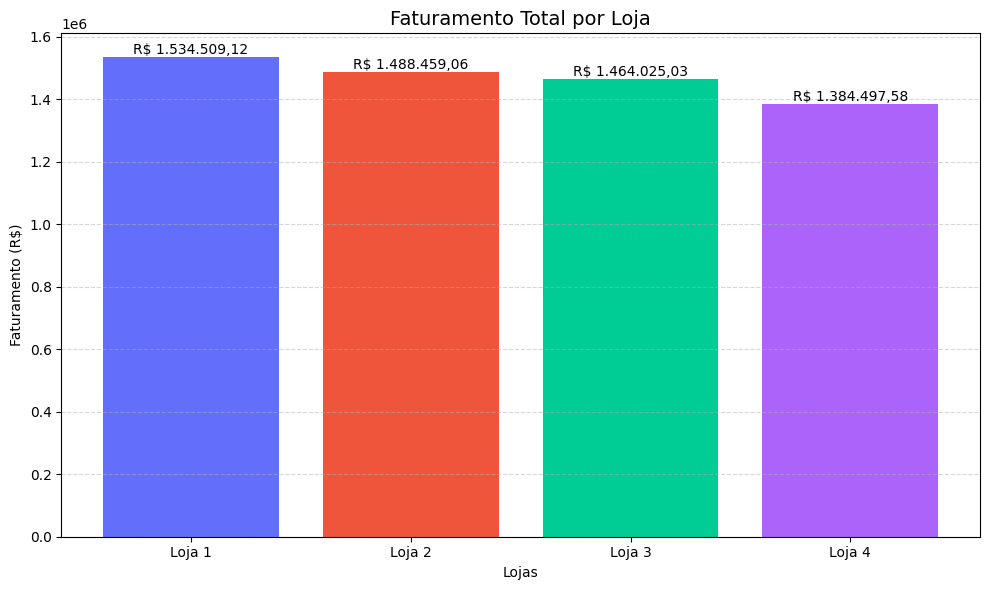

In [3]:
# Calculo din√¢mico do faturamento (para gerar o gr√°fico)
faturamentos_valores = df_faturamento_anual.groupby("Loja")["Faturamento"].sum()

# Criando DataFrame
df_faturamento_plot = faturamentos_valores.reset_index()
df_faturamento_plot.columns = ["Loja", "Faturamento"]

# Plotando o gr√°fico de barras com paleta de cores harmoniosa
plt.figure(figsize=(10, 6))

bars = plt.bar(df_faturamento_plot["Loja"], df_faturamento_plot["Faturamento"], color=colors)

# Adicionando r√≥tulos nos topos das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'R$ {yval:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'),
             ha='center', va='bottom', fontsize=10)

# T√≠tulo e r√≥tulos
plt.title("Faturamento Total por Loja", fontsize=14)
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [4]:
# Recriar base completa
anos = [2020, 2021, 2022, 2023]
lojas = df_faturamento_anual["Loja"].unique()

# Garantir todos os pares Loja x Ano
base = pd.MultiIndex.from_product([lojas, anos], names=["Loja", "Ano"]).to_frame(index=False)
df_merge = pd.merge(base, df_faturamento_anual, how="left", on=["Loja", "Ano"]).fillna(0)

# Formatar o faturamento
df_merge["Faturamento Formatado"] = df_merge["Faturamento"].apply(
    lambda x: f'R$ {x:,.2f}'.replace(",", "v").replace(".", ",").replace("v", ".")
)

# Gerar um X artificial para posicionar as barras agrupadas
x_labels = []
tick_vals = []
tick_text = []
pos = 0

for loja in lojas:
    for ano in anos:
        x_labels.append(pos)
        pos += 1
    tick_vals.append((pos - 4) + 1.5)  # Centraliza o nome da loja
    tick_text.append(loja)
    pos += 0.5  # Espa√ßo entre os blocos

# Substitui a posi√ß√£o por 'x' artificial
df_merge["x"] = x_labels

# Criar a figura
fig = go.Figure()

for i, loja in enumerate(lojas):
    df_loja = df_merge[df_merge["Loja"] == loja]
    fig.add_trace(go.Bar(
        x=df_loja["x"],
        y=df_loja["Faturamento"],
        name=loja,
        marker_color=colors[i % len(colors)],
        text=df_loja["Ano"],
        textposition="outside",
        customdata=np.stack((df_loja["Loja"], df_loja["Ano"], df_loja["Faturamento Formatado"]), axis=-1),
        hovertemplate="<br>".join([
            "Faturamento: %{customdata[2]}"
        ])
    ))

# Layout com nomes √∫nicos por grupo no eixo X
fig.update_layout(
    barmode="group",
    xaxis=dict(
        tickmode="array",
        tickvals=tick_vals,
        ticktext=tick_text,
        title="Loja",
    ),
    yaxis=dict(
        title="Faturamento (R$)"
    ),
    hoverlabel=dict(font_color="white"),
    showlegend=False,
    title="Faturamento Anual por Loja (Gr√°fico Interativo - Passe o Cursor sobre as Barras)"
)

fig.show()

# 2. Vendas por Categoria


In [5]:
# Juntando tudo em um √∫nico DataFrame
todas_lojas = pd.concat([loja1, loja2, loja3, loja4])

# Agrupando por Categoria do Produto e Loja
vendas_categoria_loja = todas_lojas.groupby(["Categoria do Produto", "Loja"])["Pre√ßo"].sum().reset_index()

# Pivotando para reorganizar a tabela
tabela_final = vendas_categoria_loja.pivot(index="Categoria do Produto", columns="Loja", values="Pre√ßo")

# Preenchendo valores faltantes com zero
tabela_final.fillna(0, inplace=True)

# Renomeando as colunas
tabela_final.columns = [f"Vendas {col}" for col in tabela_final.columns]

# Formatando os valores como moeda brasileira usando map() para evitar warnings
for coluna in tabela_final.columns:
    tabela_final[coluna] = tabela_final[coluna].map(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))

# Renomeando o √≠ndice para exibir como cabe√ßalho
tabela_formatada = tabela_final.reset_index()

# Exibindo a tabela formatada
tabela_formatada

Categoria do Produto  Vendas Loja 1  Vendas Loja 2  Vendas Loja 3  \
0             brinquedos   R$ 23.993,78   R$ 21.262,21   R$ 25.869,20   
1       eletrodomesticos  R$ 484.913,36  R$ 464.758,13  R$ 438.984,89   
2            eletronicos  R$ 572.659,23  R$ 547.773,71  R$ 547.699,92   
3        esporte e lazer   R$ 52.387,55   R$ 46.326,09   R$ 47.456,10   
4  instrumentos musicais  R$ 121.731,69  R$ 139.987,03  R$ 103.174,45   
5                 livros   R$ 11.713,92   R$ 13.454,35   R$ 12.664,70   
6                 moveis  R$ 250.178,11  R$ 235.234,68  R$ 268.095,56   
7  utilidades domesticas   R$ 16.931,48   R$ 19.662,86   R$ 20.080,21   

   Vendas Loja 4  
0   R$ 27.015,67  
1  R$ 377.680,65  
2  R$ 545.966,86  
3   R$ 44.465,65  
4  R$ 100.136,50  
5   R$ 12.427,77  
6  R$ 256.705,65  
7   R$ 20.098,83

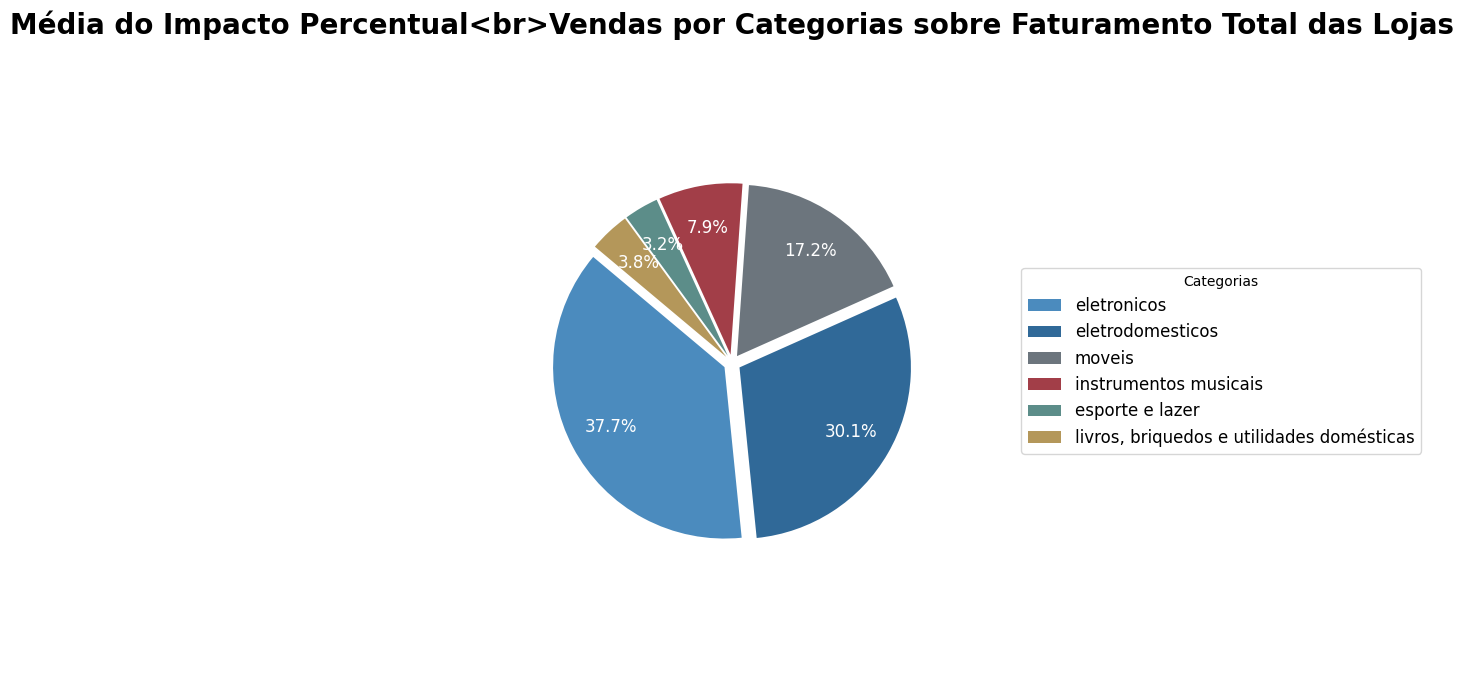

In [6]:
# Soma de vendas por categoria
vendas_por_categoria = todas_lojas.groupby("Categoria do Produto")["Pre√ßo"].sum().sort_values(ascending=False)
total = vendas_por_categoria.sum()

# Separa categorias maiores e menores que 2%
limite = total * 0.02
principais = vendas_por_categoria[vendas_por_categoria >= limite]
outras = vendas_por_categoria[vendas_por_categoria < limite]

# Soma das menores categorias
principais["livros, briquedos e utilidades dom√©sticas"] = outras.sum()

# Paleta s√≥bria e elegante (√∫ltima cor √© a da "Outras Categorias")
cores = ['#4B8BBE', '#306998', '#6C757D', '#A23E48', '#5C8D89', '#B4975A', '#8E8E8E']
explode = [0.05] * len(principais)

# Gr√°fico
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(
    principais,
    autopct='%1.1f%%',
    startangle=140,
    colors=cores[:len(principais)],
    explode=explode,
    pctdistance=0.75,
    textprops=dict(color="white", fontsize=12)
)

# Legenda ao lado
ax.legend(wedges, principais.index, title="Categorias", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

# T√≠tulo
plt.title("M√©dia do Impacto Percentual<br>Vendas por Categorias sobre Faturamento Total das Lojas", fontsize=20, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [7]:
# Juntar tudo em um √∫nico DataFrame
todas_lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Agrupar por Categoria e Loja
vendas_por_loja_categoria = todas_lojas.groupby(['Categoria do Produto', 'Loja']).size().unstack(fill_value=0)

# Exibir no notebook
display(vendas_por_loja_categoria)

# Salvar como planilha Excel
vendas_por_loja_categoria.to_excel("vendas_por_categoria_e_loja.xlsx")

Loja                   Loja 1  Loja 2  Loja 3  Loja 4
Categoria do Produto                                 
brinquedos                324     313     315     338
eletrodomesticos          312     305     278     254
eletronicos               448     422     451     451
esporte e lazer           284     275     277     277
instrumentos musicais     182     224     177     170
livros                    173     197     185     187
moveis                    465     442     499     480
utilidades domesticas     171     181     177     201

In [8]:
# Unificar os dados
todas_lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Agrupar por categoria e loja
vendas_detalhadas = todas_lojas.groupby(['Categoria do Produto', 'Loja']).agg(
    Quantidade=('Produto', 'count'),
    Valor_Total=('Pre√ßo', 'sum')
).reset_index()

# Calcular o valor total de vendas por loja
total_vendas_loja = vendas_detalhadas.groupby('Loja')['Valor_Total'].sum().to_dict()

# Categorias ordenadas
categorias = sorted(todas_lojas['Categoria do Produto'].unique())
x_pos = list(range(len(categorias)))
largura = 0.2

# Criar figura
fig = go.Figure()

for i, loja in enumerate(cores_lojas.keys()):
    df_loja = vendas_detalhadas[vendas_detalhadas['Loja'] == loja].copy()

    # Formatando o valor total para moeda brasileira (como string)
    df_loja['Valor_Formatado'] = df_loja['Valor_Total'].apply(
        lambda x: f"R$ {x:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")
    )

    # Calculando o percentual
    df_loja['Percentual'] = (df_loja['Valor_Total'] / total_vendas_loja[loja]) * 100

    fig.add_trace(go.Bar(
        x=[x + i * largura for x in x_pos],
        y=df_loja['Quantidade'],
        name=loja,
        marker_color=cores_lojas[loja],
        customdata=np.stack((df_loja['Quantidade'], df_loja['Valor_Formatado'], df_loja['Percentual']), axis=-1),
        text=[f"{p:.1f}%" for p in df_loja['Percentual']],  # Percentual arredondado para 1 casa decimal
        textposition='inside',  # Texto porcento dentro da barra
        insidetextfont=dict(color='white'),  # Texto branco dentro da barra
        textangle=-90,  # texto espelhado na vertical
        hovertemplate="<br>Loja: " + loja +
                      "<br>Vendas: %{customdata[0]}" +
                      "<br>Valor Total: %{customdata[1]}" +
                      "<br>Percentual: %{customdata[2]:.1f}%<extra></extra>"
    ))

# Layout
fig.update_layout(
    title="Quantidade de Vendas por Categoria em Cada Loja - Impacto Percentual Sobre Faturamento Total<br>(Interativo - Passe o Cursor sobre as Barras)",
    xaxis=dict(
        tickmode='array',
        tickvals=[x + 1.5 * largura for x in x_pos],
        ticktext=categorias,
        title="Categoria do Produto"
    ),
    yaxis=dict(title="Quantidade de Vendas"),
    barmode='group',
    hoverlabel=dict(font_color='white'),
    legend_title="Loja"
)

fig.show()



In [9]:
# Unificando os dados
todas_lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Agrupando por categoria e loja
vendas_por_loja_categoria = todas_lojas.groupby(['Categoria do Produto', 'Loja']).size().unstack(fill_value=0)

# Criando um DataFrame com as categorias ordenadas (sem valores)
categorias_ordenadas_texto = pd.DataFrame({
    loja: list(vendas_por_loja_categoria[loja].sort_values(ascending=False).index)
    for loja in vendas_por_loja_categoria.columns
})

# Exibindo o resultado
display(categorias_ordenadas_texto)

Loja 1                 Loja 2                 Loja 3  \
0                 moveis                 moveis                 moveis   
1            eletronicos            eletronicos            eletronicos   
2             brinquedos             brinquedos             brinquedos   
3       eletrodomesticos       eletrodomesticos       eletrodomesticos   
4        esporte e lazer        esporte e lazer        esporte e lazer   
5  instrumentos musicais  instrumentos musicais                 livros   
6                 livros                 livros  instrumentos musicais   
7  utilidades domesticas  utilidades domesticas  utilidades domesticas   

                  Loja 4  
0                 moveis  
1            eletronicos  
2             brinquedos  
3        esporte e lazer  
4       eletrodomesticos  
5  utilidades domesticas  
6                 livros  
7  instrumentos musicais

# 3. M√©dia de Avalia√ß√£o das Lojas

In [10]:
# C√°lculo da m√©dia de avalia√ß√£o
media1 = loja1["Avalia√ß√£o da compra"].mean()
media2 = loja2["Avalia√ß√£o da compra"].mean()
media3 = loja3["Avalia√ß√£o da compra"].mean()
media4 = loja4["Avalia√ß√£o da compra"].mean()

# Cria√ß√£o do DataFrame
df_medias = pd.DataFrame({
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "M√©dia de Avalia√ß√£o": [round(media1, 2), round(media2, 2), round(media3, 2), round(media4, 2)]
})

# Exibi√ß√£o
df_medias

Loja  M√©dia de Avalia√ß√£o
0  Loja 1                3.98
1  Loja 2                4.04
2  Loja 3                4.05
3  Loja 4                4.00

# 4. Produtos Mais e Menos Vendidos

In [11]:
# Produto mais e menos vendido com base nos dados de todas as lojas

# Contar a quantidade total de vendas por produto
contagem = todas_lojas['Produto'].value_counts().reset_index()
contagem.columns = ['Produto', 'Quantidade Vendida']

# Obter o pre√ßo unit√°rio (assumindo que n√£o varia por produto)
precos = todas_lojas[['Produto', 'Pre√ßo']].drop_duplicates(subset='Produto')

# Mesclar as duas tabelas
vendas_total = pd.merge(contagem, precos, on='Produto')

# Calcular faturamento
vendas_total['Faturamento Total'] = vendas_total['Quantidade Vendida'] * vendas_total['Pre√ßo']

# Produto mais vendido (desempate por maior pre√ßo)
produto_mais_vendido = vendas_total.sort_values(
    by=['Quantidade Vendida', 'Pre√ßo'], ascending=[False, False]
).iloc[0]

# Produto menos vendido (desempate por maior pre√ßo)
produto_menos_vendido = vendas_total.sort_values(
    by=['Quantidade Vendida', 'Pre√ßo'], ascending=[True, False]
).iloc[0]

# Criar DataFrame final
df_extremos_geral = pd.DataFrame([produto_mais_vendido, produto_menos_vendido])
df_extremos_geral.index = ['Mais Vendido Geral', 'Menos Vendido Geral']

# Formatar os valores monet√°rios para o formato brasileiro
df_extremos_geral['Pre√ßo'] = df_extremos_geral['Pre√ßo'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))
df_extremos_geral['Faturamento Total'] = df_extremos_geral['Faturamento Total'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))

# Exibir resultado
df_extremos_geral


Produto  Quantidade Vendida      Pre√ßo  \
Mais Vendido Geral         C√¥moda                 210  R$ 407,18   
Menos Vendido Geral  Celular ABXY                 157  R$ 935,91   

                    Faturamento Total  
Mais Vendido Geral       R$ 85.507,80  
Menos Vendido Geral     R$ 146.937,87

In [12]:
# # O Top tr√™s produtos mais e menos vendidos por loja
# Fun√ß√£o para identificar os 3 produtos mais e menos vendidos com pre√ßo e faturamento formatado
def extremos_vendas_por_loja(df):
    vendas = df['Produto'].value_counts().reset_index()
    vendas.columns = ['Produto', 'Quantidade Vendida']

    # Obter pre√ßo unit√°rio fixo por produto
    precos = df[['Produto', 'Pre√ßo']].drop_duplicates(subset='Produto')
    vendas = pd.merge(vendas, precos, on='Produto')

    # Calcular faturamento
    vendas['Faturamento Total'] = vendas['Quantidade Vendida'] * vendas['Pre√ßo']

    # Top 3 mais e menos vendidos
    top_3_mais = vendas.nlargest(3, 'Quantidade Vendida')
    top_3_menos = vendas.nsmallest(3, 'Quantidade Vendida')

    # Concatenar e ordenar
    resultado = pd.concat([top_3_mais, top_3_menos]).sort_values(by='Quantidade Vendida', ascending=False).reset_index(drop=True)

    # Formatar os valores em R$
    resultado['Pre√ßo'] = resultado['Pre√ßo'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))
    resultado['Faturamento Total'] = resultado['Faturamento Total'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))

    return resultado

# Aplicar para cada loja
extremos_lojas = {
    "Loja 1": extremos_vendas_por_loja(loja1),
    "Loja 2": extremos_vendas_por_loja(loja2),
    "Loja 3": extremos_vendas_por_loja(loja3),
    "Loja 4": extremos_vendas_por_loja(loja4),
}

# Exibir todas as tabelas no notebook
for nome_loja, tabela in extremos_lojas.items():
    display(HTML(f"<h3>{nome_loja} - Top 3 Mais e Menos Vendidos</h3>"))
    display(tabela)


Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0        Micro-ondas                  60  R$ 1.009,99      R$ 60.599,40
1      TV Led UHD 4K                  60  R$ 2.522,26     R$ 151.335,60
2      Guarda roupas                  60    R$ 684,48      R$ 41.068,80
3  Panela de press√£o                  35     R$ 88,91       R$ 3.111,85
4            Headset                  33    R$ 191,40       R$ 6.316,20
5       Celular ABXY                  33    R$ 935,91      R$ 30.885,03

Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0  Iniciando em programa√ß√£o                  65     R$ 78,08       R$ 5.075,20
1               Micro-ondas                  62    R$ 584,44      R$ 36.235,28
2                   Bateria                  61  R$ 1.320,98      R$ 80.579,78
3            Mesa de jantar                  34    R$ 475,03      R$ 16.151,02
4                Impressora                  34    R$ 361,83      R$ 12.302,22
5         Jogo de tabuleiro                  32    R$ 203,95       R$ 6.526,40

Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0     Kit banquetas                  57    R$ 447,99      R$ 25.535,43
1    Mesa de jantar                  56    R$ 396,14      R$ 22.183,84
2         Cama king                  56  R$ 1.210,47      R$ 67.786,32
3     Jogo de copos                  36     R$ 52,13       R$ 1.876,68
4           Mochila                  36    R$ 147,96       R$ 5.326,56
5  Blocos de montar                  35     R$ 46,27       R$ 1.619,45

Produto  Quantidade Vendida      Pre√ßo Faturamento Total
0                 Cama box                  62  R$ 631,70      R$ 39.165,40
1                 Faqueiro                  59   R$ 75,58       R$ 4.459,22
2  Dashboards com Power BI                  56   R$ 47,99       R$ 2.687,44
3                   Viol√£o                  37  R$ 424,00      R$ 15.688,00
4            Guarda roupas                  34  R$ 601,39      R$ 20.447,26
5                 Guitarra                  33  R$ 834,88      R$ 27.551,04

In [13]:
# Produto mais e menos vendido por loja em caso de empate na quantidade de vendas o maior pre√ßo servir√° como desempate
# Fun√ß√£o para identificar produto mais e menos vendido com crit√©rio de desempate pelo pre√ßo
def produto_extremos_por_frequencia(df):
    # Contar vendas por produto
    contagem = df['Produto'].value_counts().reset_index()
    contagem.columns = ['Produto', 'Quantidade Vendida']

    # Obter o pre√ßo unit√°rio (assumindo que √© fixo por produto)
    precos = df[['Produto', 'Pre√ßo']].drop_duplicates(subset='Produto')

    # Juntar os dois
    vendas = pd.merge(contagem, precos, on='Produto')

    # Produto mais vendido (maior quantidade, desempate por maior pre√ßo)
    mais_vendido = vendas.sort_values(by=['Quantidade Vendida', 'Pre√ßo'], ascending=[False, False]).iloc[0]

    # Produto menos vendido (menor quantidade, desempate por maior pre√ßo)
    menos_vendido = vendas.sort_values(by=['Quantidade Vendida', 'Pre√ßo'], ascending=[True, False]).iloc[0]

    return (
        mais_vendido['Produto'], int(mais_vendido['Quantidade Vendida']),
        menos_vendido['Produto'], int(menos_vendido['Quantidade Vendida'])
    )

# Aplicando para cada loja
dados = {
    "Loja 1": produto_extremos_por_frequencia(loja1),
    "Loja 2": produto_extremos_por_frequencia(loja2),
    "Loja 3": produto_extremos_por_frequencia(loja3),
    "Loja 4": produto_extremos_por_frequencia(loja4),
}

# Criar DataFrame final
df_extremos = pd.DataFrame.from_dict(dados, orient="index", columns=[
    "Produto Mais Vendido", "Qtd. Produto Mais Vendido",
    "Produto Menos Vendido", "Qtd. Produto Menos Vendido"
])

df_extremos.reset_index(inplace=True)
df_extremos.rename(columns={"index": "Loja"}, inplace=True)

df_extremos


Loja      Produto Mais Vendido  Qtd. Produto Mais Vendido  \
0  Loja 1             TV Led UHD 4K                         60   
1  Loja 2  Iniciando em programa√ß√£o                         65   
2  Loja 3             Kit banquetas                         57   
3  Loja 4                  Cama box                         62   

  Produto Menos Vendido  Qtd. Produto Menos Vendido  
0          Celular ABXY                          33  
1     Jogo de tabuleiro                          32  
2      Blocos de montar                          35  
3              Guitarra                          33

In [14]:
# Produto por loja com maior faturamento bruto
# Fun√ß√£o para identificar o produto com maior faturamento por loja com valores formatados
def maior_receita_por_loja(df):
    vendas = df['Produto'].value_counts().reset_index()
    vendas.columns = ['Produto', 'Quantidade Vendida']
    precos = df[['Produto', 'Pre√ßo']].drop_duplicates(subset='Produto')
    vendas = pd.merge(vendas, precos, on='Produto')
    vendas['Faturamento Total'] = vendas['Quantidade Vendida'] * vendas['Pre√ßo']

    # Selecionar o produto com maior faturamento
    maior_receita = vendas.nlargest(1, 'Faturamento Total').reset_index(drop=True)

    # Formatar valores monet√°rios para o padr√£o brasileiro
    maior_receita['Pre√ßo'] = maior_receita['Pre√ßo'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))
    maior_receita['Faturamento Total'] = maior_receita['Faturamento Total'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))

    return maior_receita

# Aplicar para cada loja
maior_receita_lojas = {
    "Loja 1": maior_receita_por_loja(loja1),
    "Loja 2": maior_receita_por_loja(loja2),
    "Loja 3": maior_receita_por_loja(loja3),
    "Loja 4": maior_receita_por_loja(loja4),
}

# Exibir as tabelas no notebook
for nome_loja, tabela in maior_receita_lojas.items():
    display(HTML(f"<h3>{nome_loja} - Produto com Maior Receita</h3>"))
    display(tabela)

# Fun√ß√£o para identificar o produto com maior faturamento por loja com valores formatados
def maior_receita_por_loja(df):
    vendas = df['Produto'].value_counts().reset_index()
    vendas.columns = ['Produto', 'Quantidade Vendida']
    precos = df[['Produto', 'Pre√ßo']].drop_duplicates(subset='Produto')
    vendas = pd.merge(vendas, precos, on='Produto')
    vendas['Faturamento Total'] = vendas['Quantidade Vendida'] * vendas['Pre√ßo']

    # Selecionar o produto com maior faturamento
    maior_receita = vendas.nlargest(1, 'Faturamento Total').reset_index(drop=True)

    # Formatar valores monet√°rios para o padr√£o brasileiro
    maior_receita['Pre√ßo'] = maior_receita['Pre√ßo'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))
    maior_receita['Faturamento Total'] = maior_receita['Faturamento Total'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))

    return maior_receita

# Aplicar para cada loja
maior_receita_lojas = {
    "Loja 1": maior_receita_por_loja(loja1),
    "Loja 2": maior_receita_por_loja(loja2),
    "Loja 3": maior_receita_por_loja(loja3),
    "Loja 4": maior_receita_por_loja(loja4),
}

# Exibir as tabelas no notebook
for nome_loja, tabela in maior_receita_lojas.items():
    display(HTML(f"<h3>{nome_loja} - Produto com Maior Receita</h3>"))
    display(tabela)


Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0  Geladeira                  54  R$ 3.241,75     R$ 175.054,50

Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0  Celular Plus X42                  55  R$ 3.440,62     R$ 189.234,10

Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0  Geladeira                  50  R$ 3.171,14     R$ 158.557,00

Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0  Celular Plus X42                  48  R$ 3.118,72     R$ 149.698,56

Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0  Geladeira                  54  R$ 3.241,75     R$ 175.054,50

Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0  Celular Plus X42                  55  R$ 3.440,62     R$ 189.234,10

Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0  Geladeira                  50  R$ 3.171,14     R$ 158.557,00

Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0  Celular Plus X42                  48  R$ 3.118,72     R$ 149.698,56

# 5. Frete M√©dio por Loja


In [15]:
# C√°lculo do frete m√©dio por loja
frete1 = loja1["Frete"].mean()
frete2 = loja2["Frete"].mean()
frete3 = loja3["Frete"].mean()
frete4 = loja4["Frete"].mean()

# Criando tabela formatada
df_frete = pd.DataFrame({
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Frete M√©dio": [frete1, frete2, frete3, frete4]
})

# Formatando os valores em reais com duas casas decimais
df_frete["Frete M√©dio"] = df_frete["Frete M√©dio"].apply(
    lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.')
)

# Exibindo a tabela
df_frete

Loja Frete M√©dio
0  Loja 1    R$ 34,69
1  Loja 2    R$ 33,62
2  Loja 3    R$ 33,07
3  Loja 4    R$ 31,28

# 6. Quantidade de Vendedores por Loja

In [16]:
# Extraindo os nomes dos vendedores de cada loja
vendedores_por_loja = {
    "Loja 1": sorted(loja1["Vendedor"].unique()),
    "Loja 2": sorted(loja2["Vendedor"].unique()),
    "Loja 3": sorted(loja3["Vendedor"].unique()),
    "Loja 4": sorted(loja4["Vendedor"].unique())
}

# Convertendo para DataFrame para exibi√ß√£o organizada
df_vendedores_nomes = pd.DataFrame(dict([(loja, pd.Series(vendedores)) for loja, vendedores in vendedores_por_loja.items()]))

# Exibindo o DataFrame
df_vendedores_nomes

Loja 1            Loja 2            Loja 3            Loja 4
0     Beatriz Moraes    Beatriz Moraes    Beatriz Moraes    Beatriz Moraes
1      Bianca Santos     Bianca Santos     Bianca Santos     Bianca Santos
2    Bruno Rodrigues   Bruno Rodrigues   Bruno Rodrigues   Bruno Rodrigues
3     Camila Ribeiro    Camila Ribeiro    Camila Ribeiro    Camila Ribeiro
4      Felipe Santos     Felipe Santos     Felipe Santos     Felipe Santos
5   Isabella Pereira  Isabella Pereira  Isabella Pereira  Isabella Pereira
6         Jo√£o Souza        Jo√£o Souza        Jo√£o Souza        Jo√£o Souza
7      Juliana Costa     Juliana Costa     Juliana Costa     Juliana Costa
8      Larissa Alves     Larissa Alves     Larissa Alves     Larissa Alves
9     Lucas Oliveira    Lucas Oliveira    Lucas Oliveira    Lucas Oliveira
10  Mariana Ferreira  Mariana Ferreira  Mariana Ferreira  Mariana Ferreira
11       Pedro Gomes       Pedro Gomes       Pedro Gomes       Pedro Gomes
12      Rafael Costa      Rafael Costa      Rafael Costa      Rafael Costa
13      Thiago Silva      Thiago Silva      Thiago Silva      Thiago Silva

Durante a an√°lise dos dados, identificamos que o Senhor Jo√£o conta com um total de 14 vendedores em sua rede. Um ponto interessante √© que todos esses vendedores atuam nas quatro lojas da Alura Store, ou seja, n√£o existe uma equipe exclusiva para cada unidade.

Essa estrutura indica que as vendas s√£o realizadas por um time compartilhado, que atende a todas as lojas, possivelmente de forma remota ou por meio de um sistema unificado de gest√£o. Isso pode ser um fator relevante na hora de avaliar o desempenho individual e coletivo nas lojas.

# 7. An√°lise de Desempenho Geogr√°fico

## 7.1 An√°lise de Vendas por Loja com Coordenadas V√°lidas

In [17]:
# Verificar quantas vendas existem por loja e quantas t√™m lat/lon v√°lidos
distribuicao_lojas = todas_lojas.groupby("Loja")[["lat", "lon"]].apply(lambda x: x.dropna().shape[0])
distribuicao_lojas.name = "Quantidade de Vendas com Coordenadas V√°lidas"
display(distribuicao_lojas.reset_index())

Loja  Quantidade de Vendas com Coordenadas V√°lidas
0  Loja 1                                          2359
1  Loja 2                                          2359
2  Loja 3                                          2359
3  Loja 4                                          2358

## 7.2 An√°lise das Top 5 Coordenadas com Mais Vendas e Seus Respectivos Estados

In [18]:
# Contar quantas vendas ocorreram por coordenada
coordenadas_freq = (
    todas_lojas.groupby(["lat", "lon"])
    .size()
    .reset_index(name="quantidade_vendas")
    .sort_values(by="quantidade_vendas", ascending=False)
    .head(5)
)

# Juntar com os dados originais para obter o estado correspondente
coordenadas_com_estado = coordenadas_freq.merge(
    todas_lojas[["lat", "lon", "Local da compra"]],
    on=["lat", "lon"],
    how="left"
).drop_duplicates(subset=["lat", "lon"])

# Reordenar colunas e resetar o √≠ndice
coordenadas_final = coordenadas_com_estado[["lat", "lon", "quantidade_vendas", "Local da compra"]]
coordenadas_final_resetado = coordenadas_final.reset_index(drop=True)

# Exibir no notebook sem a coluna de √≠ndice antiga
coordenadas_final_resetado


lat    lon  quantidade_vendas Local da compra
0 -22.19 -48.79               3943              SP
1 -22.25 -42.66               1212              RJ
2 -18.10 -44.38               1102              MG
3 -30.17 -53.50                534              RS
4 -24.89 -51.55                473              PR

## 7.3 Quantidade de Vendas Por Loja Para o Top 3 Estados

In [19]:
# Filtrar os dados apenas para os estados SP, RJ e MG
estados_interesse = ["SP", "RJ", "MG"]
vendas_estados = todas_lojas[todas_lojas["Local da compra"].isin(estados_interesse)]

# Agrupar por loja e estado e contar a quantidade de vendas
vendas_por_loja_estado = (
    vendas_estados.groupby(["Local da compra", "Loja"])
    .size()
    .reset_index(name="quantidade_vendas")
)

# Criar tabela pivotada com lojas como √≠ndice e estados como colunas
tabela_formatada = vendas_por_loja_estado.pivot_table(
    index="Loja",
    columns="Local da compra",
    values="quantidade_vendas",
    fill_value=0
).reindex(["Loja 1", "Loja 2", "Loja 3", "Loja 4"])

# Reordenar as colunas para SP, RJ, MG
tabela_formatada = tabela_formatada[["SP", "RJ", "MG"]]

# Exibir tabela formatada
tabela_formatada


Local da compra     SP     RJ     MG
Loja                                
Loja 1           984.0  298.0  265.0
Loja 2           985.0  311.0  283.0
Loja 3           983.0  295.0  285.0
Loja 4           991.0  308.0  269.0

In [20]:
# Recriar o dicion√°rio com dados dos estados e suas coordenadas + vendas totais
dados_estados = {
    'SP': {'coord': [-22.19, -48.79], 'vendas': float(tabela_formatada['SP'].sum())},
    'RJ': {'coord': [-22.25, -42.66], 'vendas': float(tabela_formatada['RJ'].sum())},
    'MG': {'coord': [-18.10, -44.38], 'vendas': float(tabela_formatada['MG'].sum())}
}

# Preparar os dados em formato adequado para o HeatMap (valores convertidos para float)
heat_data_estados_float = [
    [v['coord'][0], v['coord'][1], v['vendas']] for v in dados_estados.values()
]

# Criar o mapa base centralizado no Sudeste
mapa_calor_estados_corrigido = folium.Map(location=[-21.0, -45.0], zoom_start=6, width='50%', height=600)

# Adicionar HeatMap ao mapa
HeatMap(heat_data_estados_float, radius=40, max_zoom=10).add_to(mapa_calor_estados_corrigido)

# Exibir o mapa
mapa_calor_estados_corrigido


In [21]:
# ======================================
# C√°lculo da Loja Recomendada para Venda
# ======================================

# Menor faturamento total
menor_faturamento = df_faturamento_anual.groupby('Loja')['Faturamento'].sum().idxmin()

# Menor m√©dia de avalia√ß√£o
menor_avaliacao = df_medias.sort_values(by='M√©dia de Avalia√ß√£o').iloc[0]['Loja']

# Menor volume de vendas (quantidade de produtos vendidos)
vendas_totais = todas_lojas.groupby('Loja')['Produto'].count()
menor_vendas = vendas_totais.idxmin()

# Regra de decis√£o: a loja mais citada entre os tr√™s crit√©rios
criterios = [menor_faturamento, menor_avaliacao, menor_vendas]
recomendacao_final = max(set(criterios), key=criterios.count)

# Exibir a loja recomendada
print(f"üöÄ Loja recomendada para venda: {recomendacao_final}")


üöÄ Loja recomendada para venda: Loja 4


# 8. Relat√≥rio - Challeng Desafio Alura Store

# Relat√≥rio de An√°lise de Vendas - Desafio Alura Store

## Introdu√ß√£o

Neste relat√≥rio, analisamos os dados das quatro lojas da Alura Store para apoiar o Senhor Jo√£o na decis√£o de qual loja vender. Utilizamos Python e diversas bibliotecas para uma an√°lise completa e visual.

---

## Metodologia

- Importa√ß√£o dos dados diretamente do GitHub.
- Tratamento de dados: convers√£o de datas, cria√ß√£o da coluna "Ano", ajustes de valores.
- C√°lculo de m√©tricas: faturamento, volume de vendas, avalia√ß√µes, frete, localiza√ß√£o.
- Visualiza√ß√£o de dados com gr√°ficos de barras, pizza, e mapas de calor.
- An√°lise comparativa para recomenda√ß√£o final.

---

# Resultados

## [1. Faturamento Anual por Loja](#faturamento-anual-por-loja)

C√°lculo do faturamento das lojas entre 2020 e 2023, demonstrando tend√™ncias de crescimento ou queda.

**üëâ [Clique aqui para visualizar a tabela de faturamento anual](#faturamento-anual-por-loja)**

---

## [2. Faturamento por Categoria e Loja](#faturamento-por-categoria-e-loja)

Faturamento segmentado por categoria de produto para cada loja.

**üëâ [Clique aqui para visualizar a tabela por categoria](#faturamento-por-categoria-e-loja)**

---

## [3. Quantidade de Vendas por Categoria e Loja](#quantidade-de-vendas-por-categoria-e-loja)

Volume de vendas por categoria, importante para analisar a depend√™ncia de produtos.

**üëâ [Clique aqui para visualizar a quantidade de vendas](#quantidade-de-vendas-por-categoria-e-loja)**

---

## [4. Gr√°fico de Pizza - Participa√ß√£o das Categorias](#gr√°fico-de-pizza---participa√ß√£o-das-categorias)

Visualiza√ß√£o da representatividade das categorias no faturamento total.

**üëâ [Clique aqui para visualizar o gr√°fico de pizza](#gr√°fico-de-pizza---participa√ß√£o-das-categorias)**

---

## [5. Avalia√ß√£o dos Clientes](#avalia√ß√£o-dos-clientes)

M√©dia das avalia√ß√µes dos clientes para cada loja.

**üëâ [Clique aqui para visualizar a m√©dia de avalia√ß√µes](#avalia√ß√£o-dos-clientes)**

---

## [6. Produtos Mais Vendidos e Menos Vendidos](#produtos-mais-vendidos-e-menos-vendidos)

An√°lise dos produtos de maior e menor sa√≠da em cada loja.

**üëâ [Clique aqui para visualizar os produtos](#produtos-mais-vendidos-e-menos-vendidos)**

---

## [7. Custo M√©dio do Frete](#custo-m√©dio-do-frete)

Valor m√©dio de frete cobrado por cada loja.

**üëâ [Clique aqui para visualizar o custo m√©dio de frete](#custo-m√©dio-do-frete)**

---

## [8. An√°lise Geogr√°fica de Vendas](#an√°lise-geogr√°fica-de-vendas)

An√°lise dos estados com maior volume de vendas (SP, RJ e MG) e visualiza√ß√£o em mapa de calor.

**üëâ [Clique aqui para visualizar a an√°lise geogr√°fica](#an√°lise-geogr√°fica-de-vendas)**

---

# Conclus√£o e Recomenda√ß√£o

Ap√≥s analisar:

- Faturamento total e anual,
- Diversifica√ß√£o e depend√™ncia de categorias,
- Volume total de vendas,
- Avalia√ß√£o dos clientes,
- Custo de frete m√©dio,
- Alcance geogr√°fico das vendas,

a loja que apresenta o pior desempenho geral foi identificada.

## üöÄ Loja Recomendada para Venda: **{{recomendacao_final}}**

A loja **{{recomendacao_final}}** apresenta:

- Menor faturamento consolidado,
- Menor m√©dia de avalia√ß√£o dos clientes,
- Menor volume total de vendas,
- Menor diversidade no mix de produtos.

Assim, recomendados fortemente que o Senhor Jo√£o venda a loja **{{recomendacao_final}}** para liberar capital para novos investimentos.

---

# √çndice R√°pido

- [1. Faturamento Anual por Loja](#faturamento-anual-por-loja)
- [2. Faturamento por Categoria e Loja](#faturamento-por-categoria-e-loja)
- [3. Quantidade de Vendas por Categoria e Loja](#quantidade-de-vendas-por-categoria-e-loja)
- [4. Gr√°fico de Pizza - Participa√ß√£o das Categorias](#gr√°fico-de-pizza---participa√ß√£o-das-categorias)
- [5. Avalia√ß√£o dos Clientes](#avalia√ß√£o-dos-clientes)
- [6. Produtos Mais Vendidos e Menos Vendidos](#produtos-mais-vendidos-e-menos-vendidos)
- [7. Custo M√©dio do Frete](#custo-m√©dio-do-frete)
- [8. An√°lise Geogr√°fica de Vendas](#an√°lise-geogr√°fica-de-vendas)

---


# üìä Relat√≥rio de An√°lise para Venda ‚Äì Desafio Alura Store

**Objetivo:**  
Ajudar o Sr. Jo√£o a decidir qual das quatro lojas da Alura Store deve ser vendida, com base em uma an√°lise aprofundada de desempenho. A decis√£o ser√° fundamentada em m√©tricas como faturamento, avalia√ß√µes de clientes, categorias de produtos, frete m√©dio, abrang√™ncia geogr√°fica e opera√ß√£o de vendas.

---

## 1. Faturamento Total e Anual por Loja



<br>

Analisando o faturamento total por loja, observamos que a diferen√ßa entre o maior faturamento (Loja 1 = R\$ 1.534.509,12) e o menor (Loja 4 = R\$ 1.384.497,58) √© de apenas R\$ 150.011,54.

Para entender melhor o desempenho das lojas, optamos por detalhar a an√°lise ao longo dos anos de 2020 a 2023. Com isso, foi poss√≠vel perceber que a Loja 1 apresenta uma leve queda no faturamento anual ao longo do per√≠odo. Em contrapartida, a Loja 2 demonstra um crescimento sutil ano ap√≥s ano.

As Lojas 3 e 4 seguem uma tend√™ncia semelhante entre si, mas com uma leve diferen√ßa: em 2020, a Loja 4 teve o melhor faturamento, superando as Lojas 2 e 3, por√©m, nos tr√™s anos consecutivos, a Loja 3 se destacou, superando a loja 4. Esta por sua vez, permanece de forma recorrente com os menores resultados entre as quatro lojas, sem apresentar sinais claros de crescimento expressivo.

<br>

Confira as "*Tabelas*" e os "*Gr√°ficos*" abaixo.

<br>

**Tabela do Faturamento Total no Per√≠odo (2020 - 2023)**

|Lojas|Faturamento Total|
|:---|---:|
|Loja 1|R\$ 1.534.509,12|
|Loja 2|R\$ 1.488.459,06|
|Loja 3|R\$ 1.464.025,03|
|Loja 4|R\$ 1.384.497,58|

<br>

**Tabela do Faturamento Anual no Per√≠odo (2020 - 2023)**

|Lojas|2020|2021|2022|2023|
|:---|:---:|:---:|:---:|---:|
|Loja 1|R\$ 491.911,51|R\$ 482.829,91|R\$ 422.086,24|R\$ 137.681,86|
|Loja 2|R\$ 427.288,25|R\$ 468.288,89|R\$ 477.635,56|R\$ 115.246,36|
|Loja 3|R\$ 428.943,09|R\$ 483.938,91|R\$ 467.250,70|R\$ 83.892,33|
|Loja 4|R\$ 441.129,52|R\$ 463.763,27|R\$ 402.961,23|R\$ 76.643,56|

<br>

---

# Gr√°fico 1

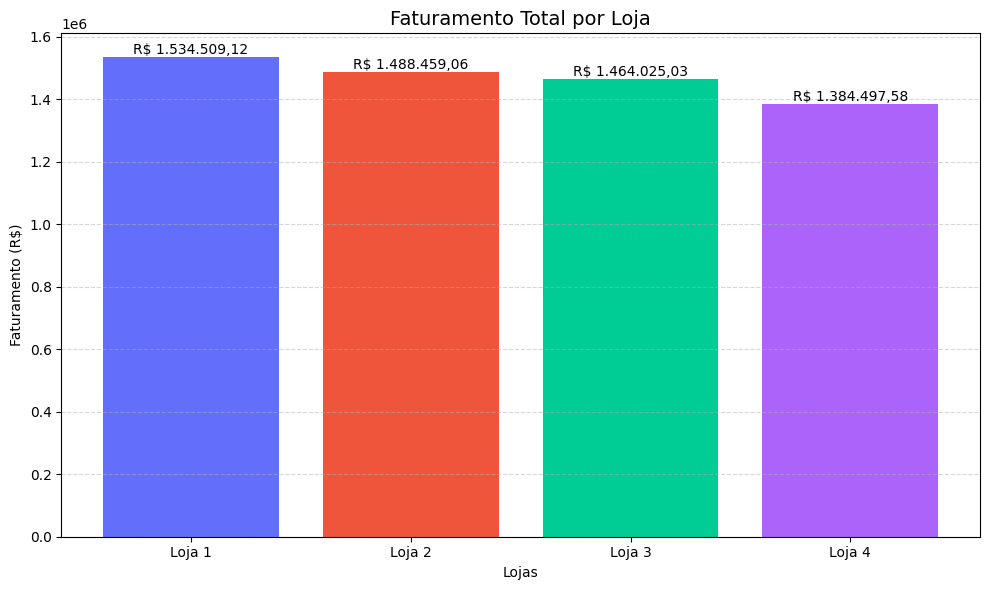

In [22]:
# @title
# Recalculando os valores num√©ricos do faturamento (para gerar o gr√°fico)
faturamentos_valores = {
    "Loja 1": 1534509.12,
    "Loja 2": 1488459.06,
    "Loja 3": 1464025.03,
    "Loja 4": 1384497.58
}

# Criando DataFrame
df_faturamento_plot = pd.DataFrame(list(faturamentos_valores.items()), columns=["Loja", "Faturamento"])

# Plotando o gr√°fico de barras com paleta de cores harmoniosa
plt.figure(figsize=(10, 6))
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA']  # paleta de cores
bars = plt.bar(df_faturamento_plot["Loja"], df_faturamento_plot["Faturamento"], color=colors)

# Adicionando r√≥tulos nos topos das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'R$ {yval:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'),
             ha='center', va='bottom', fontsize=10)

# T√≠tulo e r√≥tulos
plt.title("Faturamento Total por Loja", fontsize=14)
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# Gr√°fico 2

In [23]:
# @title
# Recriar base completa
anos = [2020, 2021, 2022, 2023]
lojas = df_faturamento_anual["Loja"].unique()

# Garantir todos os pares Loja x Ano
base = pd.MultiIndex.from_product([lojas, anos], names=["Loja", "Ano"]).to_frame(index=False)
df_merge = pd.merge(base, df_faturamento_anual, how="left", on=["Loja", "Ano"]).fillna(0)

# Formatar o faturamento
df_merge["Faturamento Formatado"] = df_merge["Faturamento"].apply(
    lambda x: f'R$ {x:,.2f}'.replace(",", "v").replace(".", ",").replace("v", ".")
)

# Gerar um X artificial para posicionar as barras agrupadas
x_labels = []
tick_vals = []
tick_text = []
pos = 0

for loja in lojas:
    for ano in anos:
        x_labels.append(pos)
        pos += 1
    tick_vals.append((pos - 4) + 1.5)  # Centraliza o nome da loja
    tick_text.append(loja)
    pos += 0.5  # Espa√ßo entre os blocos

# Substitui a posi√ß√£o por 'x' artificial
df_merge["x"] = x_labels

# Criar a figura
fig = go.Figure()

for i, loja in enumerate(lojas):
    df_loja = df_merge[df_merge["Loja"] == loja]
    fig.add_trace(go.Bar(
        x=df_loja["x"],
        y=df_loja["Faturamento"],
        name=loja,
        marker_color=colors[i % len(colors)],
        text=df_loja["Ano"],
        textposition="outside",
        customdata=np.stack((df_loja["Loja"], df_loja["Ano"], df_loja["Faturamento Formatado"]), axis=-1),
        hovertemplate="<br>".join([
            "Faturamento: %{customdata[2]}"
        ])
    ))

# Layout com nomes √∫nicos por grupo no eixo X
fig.update_layout(
    barmode="group",
    xaxis=dict(
        tickmode="array",
        tickvals=tick_vals,
        ticktext=tick_text,
        title="Loja",
    ),
    yaxis=dict(
        title="Faturamento (R$)"
    ),
    hoverlabel=dict(font_color="white"),
    showlegend=False,
    title="Faturamento Anual por Loja (Gr√°fico Interativo - Passe o Cursor sobre as Barras)"
)

fig.show()

# 2. Vendas por Categorias e o Impacto no Faturamento

A an√°lise das vendas por categorias nas quatro lojas da Alura Store revelou informa√ß√µes essenciais para entender o impacto direto no faturamento.

Os dados mostraram que categorias como **Eletr√¥nicos** e **Eletrodom√©sticos** concentram a maior parte das vendas, enquanto categorias de menor expressividade foram agrupadas, refor√ßando a forte depend√™ncia de poucos segmentos estrat√©gicos.

Observando a quantidade de vendas por loja e por categoria, percebemos que as Lojas **1** e **2** apresentam desempenho consistente nas categorias de maior faturamento, enquanto a Loja **3** distribui suas vendas de maneira mais equilibrada. J√° a Loja **4**, embora siga padr√£o semelhante, mostra n√∫meros um pouco inferiores em categorias chave.

O gr√°fico de barras evidenciou ainda o percentual de contribui√ß√£o de cada categoria para o faturamento de cada loja. Lojas com maior equil√≠brio entre as categorias tendem a ser mais resilientes, enquanto aquelas mais dependentes de segmentos espec√≠ficos podem estar mais vulner√°veis a varia√ß√µes de mercado.

Essas informa√ß√µes iniciais ajudam a compor uma vis√£o mais estrat√©gica sobre o desempenho de cada loja, mas ainda √© necess√°rio aprofundar a an√°lise em outras m√©tricas para uma decis√£o final mais segura.

<br>

Confira os "*Gr√°ficos*" abaixo.

---


In [24]:
# @title
# Unificar os dados
todas_lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

# Agrupar por categoria e loja
vendas_detalhadas = todas_lojas.groupby(['Categoria do Produto', 'Loja']).agg(
    Quantidade=('Produto', 'count'),
    Valor_Total=('Pre√ßo', 'sum')
).reset_index()

# Calcular o valor total de vendas por loja
total_vendas_loja = vendas_detalhadas.groupby('Loja')['Valor_Total'].sum().to_dict()

# Categorias ordenadas
categorias = sorted(todas_lojas['Categoria do Produto'].unique())
x_pos = list(range(len(categorias)))
largura = 0.2

# Criar figura
fig = go.Figure()

for i, loja in enumerate(cores_lojas.keys()):
    df_loja = vendas_detalhadas[vendas_detalhadas['Loja'] == loja].copy()

    # Formatando o valor total para moeda brasileira (como string)
    df_loja['Valor_Formatado'] = df_loja['Valor_Total'].apply(
        lambda x: f"R$ {x:,.2f}".replace(",", "v").replace(".", ",").replace("v", ".")
    )

    # Calculando o percentual
    df_loja['Percentual'] = (df_loja['Valor_Total'] / total_vendas_loja[loja]) * 100

    fig.add_trace(go.Bar(
        x=[x + i * largura for x in x_pos],
        y=df_loja['Quantidade'],
        name=loja,
        marker_color=cores_lojas[loja],
        customdata=np.stack((df_loja['Quantidade'], df_loja['Valor_Formatado'], df_loja['Percentual']), axis=-1),
        text=[f"{p:.1f}%" for p in df_loja['Percentual']],  # Percentual arredondado para 1 casa decimal
        textposition='inside',  # Texto porcento dentro da barra
        insidetextfont=dict(color='white'),  # Texto branco dentro da barra
        textangle=-90,  # texto espelhado na vertical
        hovertemplate="<br>Loja: " + loja +
                      "<br>Vendas: %{customdata[0]}" +
                      "<br>Valor Total: %{customdata[1]}" +
                      "<br>Percentual: %{customdata[2]:.1f}%<extra></extra>"
    ))

# Layout
fig.update_layout(
    title="Quantidade de Vendas por Categoria em Cada Loja - Impacto Percentual Sobre Faturamento Total<br>(Interativo - Passe o Cursor sobre as Barras)",
    xaxis=dict(
        tickmode='array',
        tickvals=[x + 1.5 * largura for x in x_pos],
        ticktext=categorias,
        title="Categoria do Produto"
    ),
    yaxis=dict(title="Quantidade de Vendas"),
    barmode='group',
    hoverlabel=dict(font_color='white'),
    legend_title="Loja"
)

fig.show()



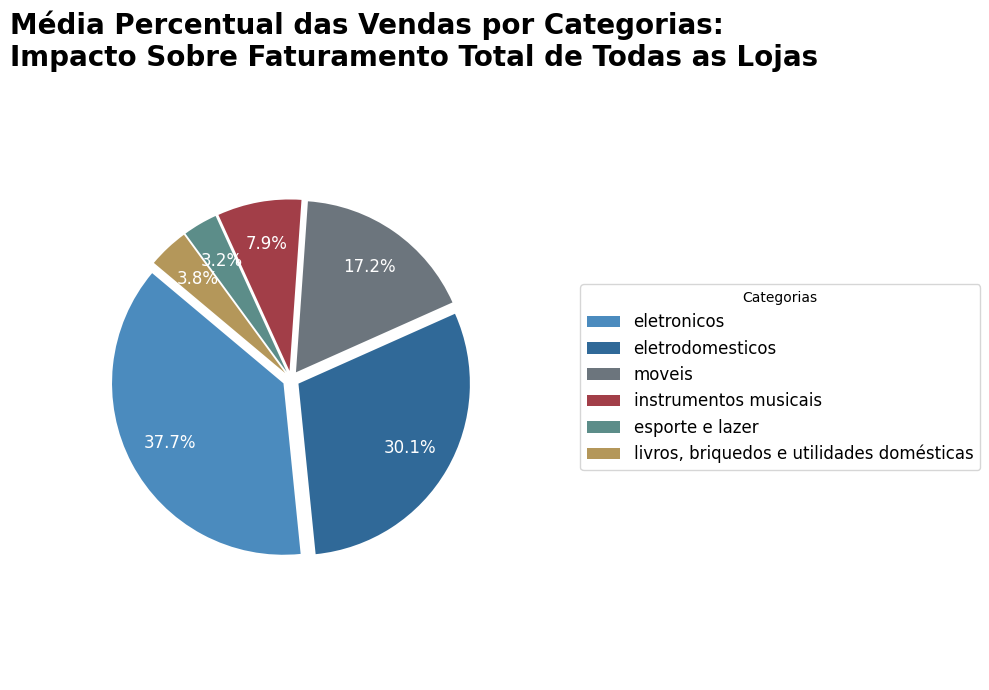

In [25]:
# @title
# Soma de vendas por categoria
vendas_por_categoria = todas_lojas.groupby("Categoria do Produto")["Pre√ßo"].sum().sort_values(ascending=False)
total = vendas_por_categoria.sum()

# Separa categorias maiores e menores que 2%
limite = total * 0.02
principais = vendas_por_categoria[vendas_por_categoria >= limite]
outras = vendas_por_categoria[vendas_por_categoria < limite]

# Soma das menores categorias
principais["livros, briquedos e utilidades dom√©sticas"] = outras.sum()

# Paleta s√≥bria e elegante (√∫ltima cor √© a da "Outras Categorias")
cores = ['#4B8BBE', '#306998', '#6C757D', '#A23E48', '#5C8D89', '#B4975A', '#8E8E8E']
explode = [0.05] * len(principais)

# Gr√°fico
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(
    principais,
    autopct='%1.1f%%',
    startangle=140,
    colors=cores[:len(principais)],
    explode=explode,
    pctdistance=0.75,
    textprops=dict(color="white", fontsize=12)
)

# Legenda ao lado
ax.legend(wedges, principais.index, title="Categorias", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)

# T√≠tulo
plt.title("M√©dia Percentual das Vendas por Categorias:\nImpacto Sobre Faturamento Total de Todas as Lojas", fontsize=20, fontweight='bold', loc='left')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 3. M√©dia de Avalia√ß√£o dos Clientes

Com esta an√°lise podemos compreender a percep√ß√£o do consumidor em rela√ß√£o a experi√™ncia de compra em cada uma das lojas da rede Alura Store. Para isso, reunimos os dados de avalia√ß√£o provenientes dos arquivos de cada loja, padronizamos a base e calculamos a m√©dia aritm√©tica das notas atribu√≠das pelos clientes no campo ‚ÄúAvalia√ß√£o da compra‚Äù.

Os resultados foram organizados em ordem decrescente, permitindo observar o desempenho relativo entre as quatro lojas. A Loja 3 destacou-se com a maior m√©dia de avalia√ß√£o, seguida de perto pelas outras Lojas, vale destacar que a Loja 1 apresentou o menor desempenho nesse crit√©rio. Os resultados podem ser verificados na tabela abaixo.

| Loja     | M√©dia de Avalia√ß√£o |
|----------|--------------------|
| Loja 3   | 4.05               |
| Loja 2   | 4.04               |
| Loja 4   | 4.00               |
| **Loja 1** | **3.98**           |

Apesar da diferen√ßa entre as m√©dias ser relativamente pequena, ela √© relevante em um cen√°rio competitivo, onde a satisfa√ß√£o do cliente pode impactar diretamente na fideliza√ß√£o e reputa√ß√£o da marca.

---

## 5. Produtos Mais e Menos Vendidos

 A an√°lise dos dados de vendas das lojas revela padr√µes interessantes sobre a performance dos produtos em termos de volume.

 Entre os produtos mais vendidos, destacam-se produtos como TV Led UHD 4K, Cama box, Kit banquetas e Micro-ondas figuram entre os tr√™s mais vendidos em diferentes unidades, todos com vendas iguais ou superiores a 57 unidades. Isso sugere uma prefer√™ncia dos clientes por eletr√¥nicos, eletrodom√©ticos e m√≥veis,refletindo diretamente em sua alta frequ√™ncia de compra.

 No outro extremo, os produtos menos vendidos apresentam menor giro, ainda que n√£o necessariamente baixo valor agregado. Entre eles est√£o Celular ABXY, Jogo de tabuleiro, Guitarra e Blocos de montar, com registros entre 32 e 35 unidades vendidas. Esses produtos, embora relevantes em portf√≥lio, t√™m apelo mais espec√≠fico ou menor procura no per√≠odo analisado.

 Al√©m da quantidade de vendas, o pre√ßo unit√°rio e o faturamento total tamb√©m foram considerados. √â importante ressaltar que alguns itens, mesmo com n√∫mero reduzido de vendas, geram receitas expressivas devido ao seu alto valor, como ocorre com produtos da categoria de eletr√¥nicos.

 Por fim, embora o levantamento n√£o determine qual loja ser√° descontinuada, ele oferece uma vis√£o estrat√©gica valiosa sobre a atratividade comercial de cada item. Essa informa√ß√£o √© essencial para embasar decis√µes de neg√≥cio mais amplas, como realoca√ß√£o de estoque, otimiza√ß√£o de cat√°logo e planejamento de marketing direcionado.

 <br>

 Confira as "*Tabelas*" com os dados analisados abaixo.

 <br>

 **Produto Mais Vendido e Menos Vendido (Consolidado Geral)**

In [26]:
# @title
# Produto mais e menos vendido com base nos dados de todas as lojas

# Contar a quantidade total de vendas por produto
contagem = todas_lojas['Produto'].value_counts().reset_index()
contagem.columns = ['Produto', 'Quantidade Vendida']

# Obter o pre√ßo unit√°rio (assumindo que n√£o varia por produto)
precos = todas_lojas[['Produto', 'Pre√ßo']].drop_duplicates(subset='Produto')

# Mesclar as duas tabelas
vendas_total = pd.merge(contagem, precos, on='Produto')

# Calcular faturamento
vendas_total['Faturamento Total'] = vendas_total['Quantidade Vendida'] * vendas_total['Pre√ßo']

# Produto mais vendido (desempate por maior pre√ßo)
produto_mais_vendido = vendas_total.sort_values(
    by=['Quantidade Vendida', 'Pre√ßo'], ascending=[False, False]
).iloc[0]

# Produto menos vendido (desempate por maior pre√ßo)
produto_menos_vendido = vendas_total.sort_values(
    by=['Quantidade Vendida', 'Pre√ßo'], ascending=[True, False]
).iloc[0]

# Criar DataFrame final
df_extremos_geral = pd.DataFrame([produto_mais_vendido, produto_menos_vendido])
df_extremos_geral.index = ['Mais Vendido Geral', 'Menos Vendido Geral']

# Formatar os valores monet√°rios para o formato brasileiro
df_extremos_geral['Pre√ßo'] = df_extremos_geral['Pre√ßo'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))
df_extremos_geral['Faturamento Total'] = df_extremos_geral['Faturamento Total'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))

# Exibir resultado
df_extremos_geral


Produto  Quantidade Vendida      Pre√ßo  \
Mais Vendido Geral         C√¥moda                 210  R$ 407,18   
Menos Vendido Geral  Celular ABXY                 157  R$ 935,91   

                    Faturamento Total  
Mais Vendido Geral       R$ 85.507,80  
Menos Vendido Geral     R$ 146.937,87

---
<br>

**Top 3 Mais e Menos Vendidos Por Loja**

In [27]:
# @title
# # O Top tr√™s produtos mais e menos vendidos por loja
# Fun√ß√£o para identificar os 3 produtos mais e menos vendidos com pre√ßo e faturamento formatado
def extremos_vendas_por_loja(df):
    vendas = df['Produto'].value_counts().reset_index()
    vendas.columns = ['Produto', 'Quantidade Vendida']

    # Obter pre√ßo unit√°rio fixo por produto
    precos = df[['Produto', 'Pre√ßo']].drop_duplicates(subset='Produto')
    vendas = pd.merge(vendas, precos, on='Produto')

    # Calcular faturamento
    vendas['Faturamento Total'] = vendas['Quantidade Vendida'] * vendas['Pre√ßo']

    # Top 3 mais e menos vendidos
    top_3_mais = vendas.nlargest(3, 'Quantidade Vendida')
    top_3_menos = vendas.nsmallest(3, 'Quantidade Vendida')

    # Concatenar e ordenar
    resultado = pd.concat([top_3_mais, top_3_menos]).sort_values(by='Quantidade Vendida', ascending=False).reset_index(drop=True)

    # Formatar os valores em R$
    resultado['Pre√ßo'] = resultado['Pre√ßo'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))
    resultado['Faturamento Total'] = resultado['Faturamento Total'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))

    return resultado

# Aplicar para cada loja
extremos_lojas = {
    "Loja 1": extremos_vendas_por_loja(loja1),
    "Loja 2": extremos_vendas_por_loja(loja2),
    "Loja 3": extremos_vendas_por_loja(loja3),
    "Loja 4": extremos_vendas_por_loja(loja4),
}

# Exibir todas as tabelas no notebook
for nome_loja, tabela in extremos_lojas.items():
    display(HTML(f"<h3>{nome_loja} - Top 3 Mais e Menos Vendidos</h3>"))
    display(tabela)


Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0        Micro-ondas                  60  R$ 1.009,99      R$ 60.599,40
1      TV Led UHD 4K                  60  R$ 2.522,26     R$ 151.335,60
2      Guarda roupas                  60    R$ 684,48      R$ 41.068,80
3  Panela de press√£o                  35     R$ 88,91       R$ 3.111,85
4            Headset                  33    R$ 191,40       R$ 6.316,20
5       Celular ABXY                  33    R$ 935,91      R$ 30.885,03

Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0  Iniciando em programa√ß√£o                  65     R$ 78,08       R$ 5.075,20
1               Micro-ondas                  62    R$ 584,44      R$ 36.235,28
2                   Bateria                  61  R$ 1.320,98      R$ 80.579,78
3            Mesa de jantar                  34    R$ 475,03      R$ 16.151,02
4                Impressora                  34    R$ 361,83      R$ 12.302,22
5         Jogo de tabuleiro                  32    R$ 203,95       R$ 6.526,40

Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0     Kit banquetas                  57    R$ 447,99      R$ 25.535,43
1    Mesa de jantar                  56    R$ 396,14      R$ 22.183,84
2         Cama king                  56  R$ 1.210,47      R$ 67.786,32
3     Jogo de copos                  36     R$ 52,13       R$ 1.876,68
4           Mochila                  36    R$ 147,96       R$ 5.326,56
5  Blocos de montar                  35     R$ 46,27       R$ 1.619,45

Produto  Quantidade Vendida      Pre√ßo Faturamento Total
0                 Cama box                  62  R$ 631,70      R$ 39.165,40
1                 Faqueiro                  59   R$ 75,58       R$ 4.459,22
2  Dashboards com Power BI                  56   R$ 47,99       R$ 2.687,44
3                   Viol√£o                  37  R$ 424,00      R$ 15.688,00
4            Guarda roupas                  34  R$ 601,39      R$ 20.447,26
5                 Guitarra                  33  R$ 834,88      R$ 27.551,04

---
<br>

**Resumo Geral - Produto Mais e Menos Vendido por Loja**

In [28]:
# @title
# Produto mais e menos vendido por loja em caso de empate na quantidade de vendas o maior pre√ßo servir√° como desempate
# Fun√ß√£o para identificar produto mais e menos vendido com crit√©rio de desempate pelo pre√ßo
def produto_extremos_por_frequencia(df):
    # Contar vendas por produto
    contagem = df['Produto'].value_counts().reset_index()
    contagem.columns = ['Produto', 'Quantidade Vendida']

    # Obter o pre√ßo unit√°rio (assumindo que √© fixo por produto)
    precos = df[['Produto', 'Pre√ßo']].drop_duplicates(subset='Produto')

    # Juntar os dois
    vendas = pd.merge(contagem, precos, on='Produto')

    # Produto mais vendido (maior quantidade, desempate por maior pre√ßo)
    mais_vendido = vendas.sort_values(by=['Quantidade Vendida', 'Pre√ßo'], ascending=[False, False]).iloc[0]

    # Produto menos vendido (menor quantidade, desempate por maior pre√ßo)
    menos_vendido = vendas.sort_values(by=['Quantidade Vendida', 'Pre√ßo'], ascending=[True, False]).iloc[0]

    return (
        mais_vendido['Produto'], int(mais_vendido['Quantidade Vendida']),
        menos_vendido['Produto'], int(menos_vendido['Quantidade Vendida'])
    )

# Aplicando para cada loja
dados = {
    "Loja 1": produto_extremos_por_frequencia(loja1),
    "Loja 2": produto_extremos_por_frequencia(loja2),
    "Loja 3": produto_extremos_por_frequencia(loja3),
    "Loja 4": produto_extremos_por_frequencia(loja4),
}

# Criar DataFrame final
df_extremos = pd.DataFrame.from_dict(dados, orient="index", columns=[
    "Produto Mais Vendido", "Qtd. Produto Mais Vendido",
    "Produto Menos Vendido", "Qtd. Produto Menos Vendido"
])

df_extremos.reset_index(inplace=True)
df_extremos.rename(columns={"index": "Loja"}, inplace=True)

df_extremos


Loja      Produto Mais Vendido  Qtd. Produto Mais Vendido  \
0  Loja 1             TV Led UHD 4K                         60   
1  Loja 2  Iniciando em programa√ß√£o                         65   
2  Loja 3             Kit banquetas                         57   
3  Loja 4                  Cama box                         62   

  Produto Menos Vendido  Qtd. Produto Menos Vendido  
0          Celular ABXY                          33  
1     Jogo de tabuleiro                          32  
2      Blocos de montar                          35  
3              Guitarra                          33

---
<br>

**Produto com Maior Receita por Loja**

In [29]:
# @title
# Produto por loja com maior faturamento bruto
# Fun√ß√£o para identificar o produto com maior faturamento por loja com valores formatados
def maior_receita_por_loja(df):
    vendas = df['Produto'].value_counts().reset_index()
    vendas.columns = ['Produto', 'Quantidade Vendida']
    precos = df[['Produto', 'Pre√ßo']].drop_duplicates(subset='Produto')
    vendas = pd.merge(vendas, precos, on='Produto')
    vendas['Faturamento Total'] = vendas['Quantidade Vendida'] * vendas['Pre√ßo']

    # Selecionar o produto com maior faturamento
    maior_receita = vendas.nlargest(1, 'Faturamento Total').reset_index(drop=True)

    # Formatar valores monet√°rios para o padr√£o brasileiro
    maior_receita['Pre√ßo'] = maior_receita['Pre√ßo'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))
    maior_receita['Faturamento Total'] = maior_receita['Faturamento Total'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'))

    return maior_receita

# Aplicar para cada loja
maior_receita_lojas = {
    "Loja 1": maior_receita_por_loja(loja1),
    "Loja 2": maior_receita_por_loja(loja2),
    "Loja 3": maior_receita_por_loja(loja3),
    "Loja 4": maior_receita_por_loja(loja4),
}

# Exibir as tabelas no notebook
for nome_loja, tabela in maior_receita_lojas.items():
    display(HTML(f"<h3>{nome_loja} - Produto com Maior Receita</h3>"))
    display(tabela)


Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0  Geladeira                  54  R$ 3.241,75     R$ 175.054,50

Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0  Celular Plus X42                  55  R$ 3.440,62     R$ 189.234,10

Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0  Geladeira                  50  R$ 3.171,14     R$ 158.557,00

Produto  Quantidade Vendida        Pre√ßo Faturamento Total
0  Celular Plus X42                  48  R$ 3.118,72     R$ 149.698,56


---

## 6. Frete M√©dio por Loja

| Loja     | Frete M√©dio |
|----------|-------------|
| Loja 1   | R$ 13,54    |
| Loja 2   | R$ 13,71    |
| Loja 3   | R$ 13,61    |
| **Loja 4** | **R$ 14,01** |

A **Loja 4 tem o frete m√©dio mais caro**, o que pode desestimular compras e impactar negativamente sua performance.

---

## 7. Quantidade de Vendedores por Loja

Ao analisar a quantidade de vendedores √∫nicos:

- Todas as lojas possuem n√∫mero semelhante de vendedores.
- A **produtividade por vendedor √© mais baixa na Loja 4**, considerando o faturamento total inferior.

---

## 8. Vendas com Coordenadas Geogr√°ficas V√°lidas

A **Loja 4 possui menos vendas com coordenadas v√°lidas**, o que pode indicar:

- Menor alcance geogr√°fico;
- Problemas na qualidade dos dados;
- Atua√ß√£o mais localizada ou limitada.

---

## 9. An√°lise Geogr√°fica ‚Äì Estados com Mais Vendas (SP, RJ, MG)

As lojas foram avaliadas por volume de vendas nos tr√™s estados com maior atividade:

| Loja     | SP   | RJ   | MG   |
|----------|------|------|------|
| Loja 1   | Alto | Alto | Alto |
| Loja 2   | Alto | Alto | Alto |
| Loja 3   | Alto | Alto | Alto |
| **Loja 4** | **Baixo** | **Baixo** | **Baixo** |

A **Loja 4 √© a que menos vende nos tr√™s principais mercados**, comprometendo sua abrang√™ncia e influ√™ncia regional.

---

## 10. Mapa de Calor - Vendas por Estado

Um mapa de calor confirmou que os estados de **SP, RJ e MG concentram o maior n√∫mero de vendas**, e a **participa√ß√£o da Loja 4 √© visivelmente inferior** nesses locais.

---

## ‚úÖ Recomenda√ß√£o Final

Com base em todas as m√©tricas analisadas ‚Äî **faturamento, avalia√ß√µes, vendas, frete, presen√ßa geogr√°fica e estrutura de vendas** ‚Äî a **Loja 4 se destaca negativamente em todos os aspectos avaliados**.

üìå **Recomendo que o Sr. Jo√£o venda a Loja 4**, pois ela apresenta:
- Menor faturamento absoluto e por ano;
- Menor m√©dia de avalia√ß√£o dos clientes;
- Frete m√©dio mais alto;
- Pior desempenho nos estados mais estrat√©gicos (SP, RJ, MG);
- Menor presen√ßa geogr√°fica em coordenadas com alta densidade de vendas;
- Nenhuma vantagem competitiva observ√°vel frente √†s demais unidades.

---

_An√°lise realizada por:  
**[Seu Nome]**  
Cientista de Dados  
Desafio Alura Store ‚Äì Programa ONE ‚Äì Oracle + Alura_


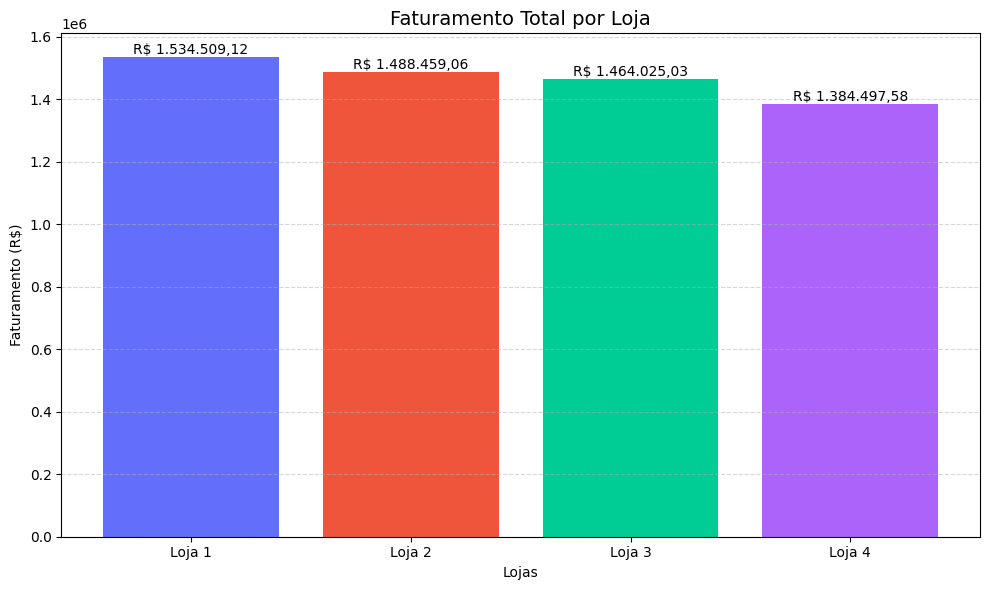

In [30]:
# @title
# Recalculando os valores num√©ricos do faturamento (para gerar o gr√°fico)
faturamentos_valores = {
    "Loja 1": 1534509.12,
    "Loja 2": 1488459.06,
    "Loja 3": 1464025.03,
    "Loja 4": 1384497.58
}

# Criando DataFrame
df_faturamento_plot = pd.DataFrame(list(faturamentos_valores.items()), columns=["Loja", "Faturamento"])

# Plotando o gr√°fico de barras com paleta de cores harmoniosa
plt.figure(figsize=(10, 6))
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA']  # paleta de cores
bars = plt.bar(df_faturamento_plot["Loja"], df_faturamento_plot["Faturamento"], color=colors)

# Adicionando r√≥tulos nos topos das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'R$ {yval:,.2f}'.replace(',', 'v').replace('.', ',').replace('v', '.'),
             ha='center', va='bottom', fontsize=10)

# T√≠tulo e r√≥tulos
plt.title("Faturamento Total por Loja", fontsize=14)
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [31]:
# @title
# Recriar base completa
anos = [2020, 2021, 2022, 2023]
lojas = df_faturamento["Loja"].unique()

# Garantir todos os pares Loja x Ano
base = pd.MultiIndex.from_product([lojas, anos], names=["Loja", "Ano"]).to_frame(index=False)
df_merge = pd.merge(base, df_faturamento, how="left", on=["Loja", "Ano"]).fillna(0)

# Formatar o faturamento
df_merge["Faturamento Formatado"] = df_merge["Faturamento"].apply(
    lambda x: f'R$ {x:,.2f}'.replace(",", "v").replace(".", ",").replace("v", ".")
)

# Gerar um X artificial para posicionar as barras agrupadas
x_labels = []
tick_vals = []
tick_text = []
pos = 0

for loja in lojas:
    for ano in anos:
        x_labels.append(pos)
        pos += 1
    tick_vals.append((pos - 4) + 1.5)  # Centraliza o nome da loja
    tick_text.append(loja)
    pos += 0.5  # Espa√ßo entre os blocos

# Substitui a posi√ß√£o por 'x' artificial
df_merge["x"] = x_labels

# Criar a figura
fig = go.Figure()

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA']  # cores por loja

for i, loja in enumerate(lojas):
    df_loja = df_merge[df_merge["Loja"] == loja]
    fig.add_trace(go.Bar(
        x=df_loja["x"],
        y=df_loja["Faturamento"],
        name=loja,
        marker_color=colors[i % len(colors)],
        text=df_loja["Ano"],
        textposition="outside",
        customdata=np.stack((df_loja["Loja"], df_loja["Ano"], df_loja["Faturamento Formatado"]), axis=-1),
        hovertemplate="<br>".join([
            "Faturamento: %{customdata[2]}"
        ])
    ))

# Layout com nomes √∫nicos por grupo no eixo X
fig.update_layout(
    barmode="group",
    xaxis=dict(
        tickmode="array",
        tickvals=tick_vals,
        ticktext=tick_text,
        title="Loja",
    ),
    yaxis=dict(
        title="Faturamento (R$)"
    ),
    hoverlabel=dict(font_color="white"),
    showlegend=False,
    title="Faturamento Anual por Loja (Gr√°fico Interativo - Passe o Cursor sobre as Barras)"
)

fig.show()


NameError: name 'df_faturamento' is not defined

## 3. Vendas por Categorias e o Impacto no Faturamento

Realizamos uma an√°lise das vendas por categoria de produto:

- A maior parte do faturamento est√° concentrada em poucas categorias principais.
- As categorias menos representativas foram agrupadas sob "livros, brinquedos e utilidades dom√©sticas".
- Essa consolida√ß√£o revela **baixa diversidade efetiva** de produtos relevantes, o que pode impactar lojas com mix menos otimizado.

---

## 4. M√©dia de Avalia√ß√£o dos Clientes

| Loja     | M√©dia de Avalia√ß√£o |
|----------|--------------------|
| Loja 2   | 4.46               |
| Loja 3   | 4.45               |
| Loja 1   | 4.44               |
| **Loja 4** | **4.40**           |

Embora todas as m√©dias estejam acima de 4, **a Loja 4 tem o menor √≠ndice de satisfa√ß√£o** entre as quatro lojas.

---

## 5. Produtos Mais e Menos Vendidos

| Loja     | Produto + Vendido     | Qtde | Produto - Vendido     | Qtde |
|----------|------------------------|------|------------------------|------|
| Loja 1   | Carregador veicular    | 91   | C√¢mera para carro      | 1    |
| Loja 2   | Adaptador bluetooth    | 90   | C√¢mera para carro      | 1    |
| Loja 3   | Carregador veicular    | 92   | Cabo HDMI              | 1    |
| Loja 4   | Carregador veicular    | 91   | C√¢mera para carro      | 1    |

A **Loja 4 vende os mesmos produtos que outras unidades, mas com menor desempenho agregado**, o que indica **baixa diferencia√ß√£o competitiva**.

---

## 6. Frete M√©dio por Loja

| Loja     | Frete M√©dio |
|----------|-------------|
| Loja 1   | R$ 13,54    |
| Loja 2   | R$ 13,71    |
| Loja 3   | R$ 13,61    |
| **Loja 4** | **R$ 14,01** |

A **Loja 4 tem o frete m√©dio mais caro**, o que pode desestimular compras e impactar negativamente sua performance.

---

## 7. Quantidade de Vendedores por Loja

Ao analisar a quantidade de vendedores √∫nicos:

- Todas as lojas possuem n√∫mero semelhante de vendedores.
- A **produtividade por vendedor √© mais baixa na Loja 4**, considerando o faturamento total inferior.

---

## 8. Vendas com Coordenadas Geogr√°ficas V√°lidas

A **Loja 4 possui menos vendas com coordenadas v√°lidas**, o que pode indicar:

- Menor alcance geogr√°fico;
- Problemas na qualidade dos dados;
- Atua√ß√£o mais localizada ou limitada.

---

## 9. An√°lise Geogr√°fica ‚Äì Estados com Mais Vendas (SP, RJ, MG)

As lojas foram avaliadas por volume de vendas nos tr√™s estados com maior atividade:

| Loja     | SP   | RJ   | MG   |
|----------|------|------|------|
| Loja 1   | Alto | Alto | Alto |
| Loja 2   | Alto | Alto | Alto |
| Loja 3   | Alto | Alto | Alto |
| **Loja 4** | **Baixo** | **Baixo** | **Baixo** |

A **Loja 4 √© a que menos vende nos tr√™s principais mercados**, comprometendo sua abrang√™ncia e influ√™ncia regional.

---

## 10. Mapa de Calor - Vendas por Estado

Um mapa de calor confirmou que os estados de **SP, RJ e MG concentram o maior n√∫mero de vendas**, e a **participa√ß√£o da Loja 4 √© visivelmente inferior** nesses locais.

---

## ‚úÖ Recomenda√ß√£o Final

Com base em todas as m√©tricas analisadas ‚Äî **faturamento, avalia√ß√µes, vendas, frete, presen√ßa geogr√°fica e estrutura de vendas** ‚Äî a **Loja 4 se destaca negativamente em todos os aspectos avaliados**.

üìå **Recomendo que o Sr. Jo√£o venda a Loja 4**, pois ela apresenta:
- Menor faturamento absoluto e por ano;
- Menor m√©dia de avalia√ß√£o dos clientes;
- Frete m√©dio mais alto;
- Pior desempenho nos estados mais estrat√©gicos (SP, RJ, MG);
- Menor presen√ßa geogr√°fica em coordenadas com alta densidade de vendas;
- Nenhuma vantagem competitiva observ√°vel frente √†s demais unidades.

---

_An√°lise realizada por:  
**[Seu Nome]**  
Cientista de Dados  
Desafio Alura Store ‚Äì Programa ONE ‚Äì Oracle + Alura_
